In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn_extra.cluster import KMedoids
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (13, 8)
import seaborn as sns

In [3]:
os.chdir("D:\HYEM'S\GraduatedSchool\PROJECTS\MyProjects\ProcessMining_PISA2012\datasets")
print(os.getcwd())

D:\HYEM'S\GraduatedSchool\PROJECTS\MyProjects\ProcessMining_PISA2012\datasets


In [4]:
original = pd.read_csv('./1_GenerateVariables_3_merge.csv')
original

,Unnamed: 0,ID,cnt,time_A_total,time_b1,time_b2,time_B_total,time_start,time_end,time_total,credit,time_answer,time_not_answer,time_solving,events_num,avg_time_btw_events,sequence,length
0,1,ARE000018904852,ARE,0.0,0.0,0.0,0.0,8.9,3.8,40.8,0,0.0,28.1,28.1,3,9.366667,NaN,0
1,2,ARE000018904861,ARE,0.0,0.0,0.0,0.0,26.2,9.9,58.4,0,0.0,22.3,22.3,3,7.433333,NaN,0
2,3,ARE000018904843,ARE,0.0,0.0,0.0,0.0,29.8,9.9,59.3,0,0.0,19.6,19.6,8,2.450000,NaN,0
3,4,ARE000018904832,ARE,0.0,0.0,0.0,0.0,34.4,5.0,64.8,0,0.0,25.4,25.4,3,8.466667,NaN,0
4,5,ARE000040210135,ARE,0.0,0.0,0.0,0.0,143.3,16.9,181.6,0,0.0,21.4,21.4,4,5.350000,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30409,30410,USA000015004637,USA,25.8,11.5,0.0,11.5,19.8,2.5,64.0,1,37.3,4.4,41.7,10,4.170000,ab,2
30410,30411,USA000007902358,USA,35.9,12.9,0.0,12.9,24.7,6.4,81.3,1,48.8,1.4,50.2,8,6.275000,ab,2
30411,30412,USA000007902371,USA,33.3,15.8,0.0,15.8,11.9,12.5,74.4,1,49.1,0.9,50.0,11,4.545455,ab,2
30412,30413,USA000007902381,USA,9.1,5.9,0.0,5.9,11.3,4.4,95.4,1,15.0,64.7,79.7,35,2.277143,bab,3


In [5]:
original[original.isnull().any(axis=1)]

,Unnamed: 0,ID,cnt,time_A_total,time_b1,time_b2,time_B_total,time_start,time_end,time_total,credit,time_answer,time_not_answer,time_solving,events_num,avg_time_btw_events,sequence,length
0,1,ARE000018904852,ARE,0.0,0.0,0.0,0.0,8.9,3.8,40.8,0,0.0,28.1,28.1,3,9.366667,NaN,0
1,2,ARE000018904861,ARE,0.0,0.0,0.0,0.0,26.2,9.9,58.4,0,0.0,22.3,22.3,3,7.433333,NaN,0
2,3,ARE000018904843,ARE,0.0,0.0,0.0,0.0,29.8,9.9,59.3,0,0.0,19.6,19.6,8,2.450000,NaN,0
3,4,ARE000018904832,ARE,0.0,0.0,0.0,0.0,34.4,5.0,64.8,0,0.0,25.4,25.4,3,8.466667,NaN,0
4,5,ARE000040210135,ARE,0.0,0.0,0.0,0.0,143.3,16.9,181.6,0,0.0,21.4,21.4,4,5.350000,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30394,30395,USA000008902685,USA,0.0,0.0,0.0,0.0,17.2,8.6,33.4,0,0.0,7.6,7.6,3,2.533333,NaN,0
30399,30400,USA000015904920,USA,0.0,0.0,0.0,0.0,23.7,2.5,69.9,0,0.0,43.7,43.7,3,14.566667,NaN,0
30402,30403,USA000010403181,USA,0.0,0.0,0.0,0.0,32.8,3.7,79.6,0,0.0,43.1,43.1,3,14.366667,NaN,0
30403,30404,USA000010403168,USA,0.0,0.0,0.0,0.0,15.1,5.0,76.5,0,0.0,56.4,56.4,17,3.317647,NaN,0


In [6]:
df = original[['ID','credit','time_start','time_answer','time_not_answer','time_solving','avg_time_btw_events','events_num','length']]
df.set_index('ID', inplace=True)
df

,credit,time_start,time_answer,time_not_answer,time_solving,avg_time_btw_events,events_num,length
ID,,,,,,,,
ARE000018904852,0,8.9,0.0,28.1,28.1,9.366667,3,0
ARE000018904861,0,26.2,0.0,22.3,22.3,7.433333,3,0
ARE000018904843,0,29.8,0.0,19.6,19.6,2.450000,8,0
ARE000018904832,0,34.4,0.0,25.4,25.4,8.466667,3,0
ARE000040210135,0,143.3,0.0,21.4,21.4,5.350000,4,0
...,...,...,...,...,...,...,...,...
USA000015004637,1,19.8,37.3,4.4,41.7,4.170000,10,2
USA000007902358,1,24.7,48.8,1.4,50.2,6.275000,8,2
USA000007902371,1,11.9,49.1,0.9,50.0,4.545455,11,2


In [7]:
df_1 = df[df['credit']==1]
df_0 = df[df['credit']==0]
display(df_1.head())
display(df_0.head())
print(len(df_1), len(df_0))

,credit,time_start,time_answer,time_not_answer,time_solving,avg_time_btw_events,events_num,length
ID,,,,,,,,
ARE000027907117,1,154.4,53.9,10.4,64.3,4.286667,15,3
ARE000011302798,1,28.4,153.0,65.0,218.0,7.032258,31,3
ARE000018804820,1,40.8,55.9,2.9,58.8,5.880000,10,2
ARE000039910042,1,20.8,41.4,28.9,70.3,1.597727,44,5
ARE000006001557,1,9.3,58.2,29.9,88.1,3.524000,25,4


,credit,time_start,time_answer,time_not_answer,time_solving,avg_time_btw_events,events_num,length
ID,,,,,,,,
ARE000018904852,0,8.9,0.0,28.1,28.1,9.366667,3,0
ARE000018904861,0,26.2,0.0,22.3,22.3,7.433333,3,0
ARE000018904843,0,29.8,0.0,19.6,19.6,2.450000,8,0
ARE000018904832,0,34.4,0.0,25.4,25.4,8.466667,3,0
ARE000040210135,0,143.3,0.0,21.4,21.4,5.350000,4,0


7182 23232


In [8]:
# Get names of indexes for which column Stock has value No
indexNames = df_1[ (df_1['time_not_answer'] == 1308.4) | (df_1['time_not_answer'] == 425.8)
                    | (df_1['time_start'] == 593.0) | (df_1['avg_time_btw_events'] == 62.8136363636364)].index

# Delete these row indexes from dataFrame
df_1.drop(indexNames , inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
df_2 = df_1[['time_start','length','avg_time_btw_events']]
df_2

,time_start,length,avg_time_btw_events
ID,,,
ARE000027907117,154.4,3,4.286667
ARE000011302798,28.4,3,7.032258
ARE000018804820,40.8,2,5.880000
ARE000039910042,20.8,5,1.597727
ARE000006001557,9.3,4,3.524000
...,...,...,...
USA000015004612,15.7,2,2.250000
USA000015004637,19.8,2,4.170000
USA000007902358,24.7,2,6.275000


In [10]:
x = df_2.to_numpy()
x = RobustScaler().fit_transform(x)
df_scale = pd.DataFrame(x, columns = df_2.columns, index = df_2.index)
df_scale

,time_start,length,avg_time_btw_events
ID,,,
ARE000027907117,13.192308,0.0,0.723708
ARE000011302798,1.076923,0.0,2.222706
ARE000018804820,2.269231,-0.5,1.593613
ARE000039910042,0.346154,1.0,-0.744361
ARE000006001557,-0.759615,0.5,0.307318
...,...,...,...
USA000015004612,-0.144231,-0.5,-0.388242
USA000015004637,0.250000,-0.5,0.660012
USA000007902358,0.721154,-0.5,1.809269


<AxesSubplot:xlabel='time_start', ylabel='Density'>

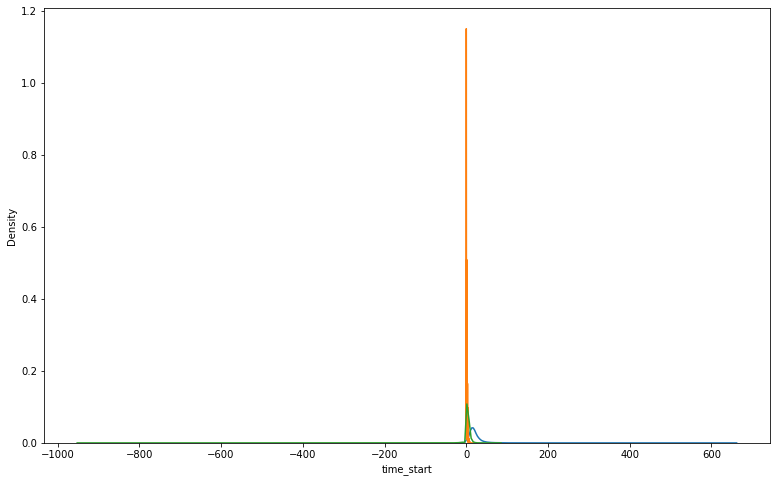

In [11]:
sns.kdeplot(df['time_start'])
sns.kdeplot(df['length'])
sns.kdeplot(df['avg_time_btw_events'])

<AxesSubplot:xlabel='time_start', ylabel='Density'>

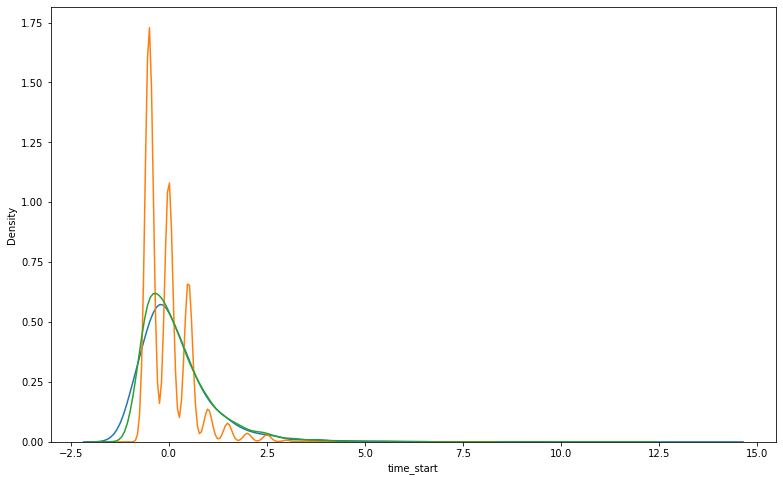

In [12]:
sns.kdeplot(df_scale['time_start'])
sns.kdeplot(df_scale['length'])
sns.kdeplot(df_scale['avg_time_btw_events'])

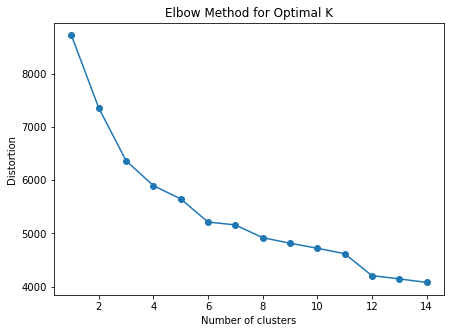

In [13]:
distortions = []
for i in range(1, 15):
    kmedoids = KMedoids(n_clusters=i, random_state=0).fit(x)
    #inertia가 군집 내의 분산을 의미
    distortions.append(kmedoids.inertia_)

# plot
plt.figure(figsize=(7,5))
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show()

In [14]:
num = 8
kmedoids = KMedoids(n_clusters=num, random_state=0).fit(x)
print(kmedoids.labels_)

[3 7 3 ... 7 4 6]


In [15]:
df_scale['cluster'] = kmedoids.labels_
df_scale['credit'] = df_1['credit']
df_scale

,time_start,length,avg_time_btw_events,cluster,credit
ID,,,,,
ARE000027907117,13.192308,0.0,0.723708,3,1
ARE000011302798,1.076923,0.0,2.222706,7,1
ARE000018804820,2.269231,-0.5,1.593613,3,1
ARE000039910042,0.346154,1.0,-0.744361,5,1
ARE000006001557,-0.759615,0.5,0.307318,6,1
...,...,...,...,...,...
USA000015004612,-0.144231,-0.5,-0.388242,5,1
USA000015004637,0.250000,-0.5,0.660012,2,1
USA000007902358,0.721154,-0.5,1.809269,7,1


# 두 변수 상관이 너무 높음

<AxesSubplot:xlabel='time_start', ylabel='avg_time_btw_events'>

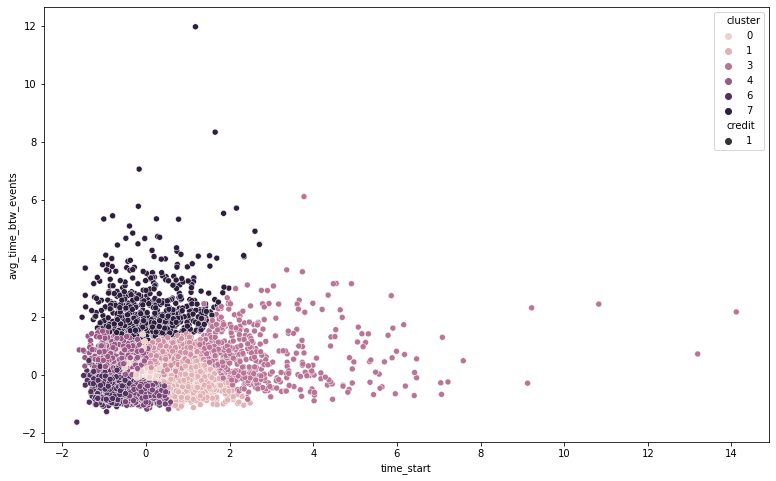

In [16]:
sns.scatterplot(data=df_scale, x="time_start", y="avg_time_btw_events", hue="cluster", style="credit")

Text(0.5, 0, 'avg_time_btw_events')

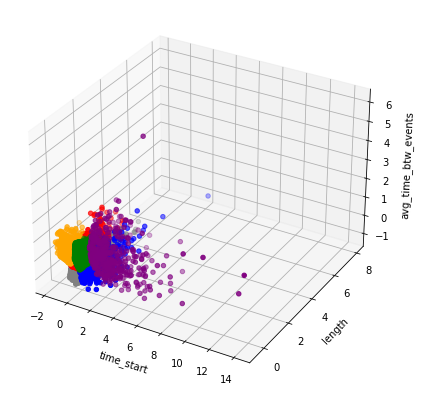

In [17]:
# 3차원 코드 참고
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
colors = ['r','b','g','purple','orange','gray']

for i, color in enumerate(colors):
    x = df_scale[df_scale['cluster'] == i]['time_start']
    y = df_scale[df_scale['cluster'] == i]['length']
    z = df_scale[df_scale['cluster'] == i]['avg_time_btw_events']
    ax.scatter(x,y,z,c=color,marker='o')

ax.set_xlabel('time_start')
ax.set_ylabel('length')
ax.set_zlabel('avg_time_btw_events')